In [38]:
#!/usr/local/bin/env python
from __future__ import division
import time
from copy import deepcopy
import numpy as np
from numpy.random import random_sample as rs
from scipy.stats.mstats import mquantiles as mq
from radd import build, fit, vis

In [39]:
dirpath = '/home/kyle/Dropbox/xPro_V/'
if not os.path.isdir(dirpath):
      os.mkdir(dirpath)
os.chdir(dirpath)

data = prodf_store['prodata']
inits = dict(deepcopy(ttheta))
#inits['v'] = np.mean(vopt.values())
inits['tr'] = np.mean(topt.values())
inits['xb']=2

In [59]:
m = build.Model(data=data, kind='xpro', fit_on='average', dynamic='exp', depends_on={'v':'pGo'}, tb=.560)

In [41]:
m.make_optimizer(tol=1.e-5, maxfev=2000)

In [57]:
m.tb

0.55

In [64]:
upper = m.data[m.data.isin([.6,.8,1.0])].response.mean()
lower = m.data[m.data.pGo.isin([.0,.2,.4])].response.mean()
qvar = m.observed.std().iloc[6:].values
hi = qvar[:5]; lo = qvar[5:]
qwts = np.hstack([upper*(hi[2]/hi), lower*(lo[2]/lo)])
prob = array([.1,.3,.5, .7,.9])
nrtc=2
#pvar = self.data.groupby('pGo').std().response.values
#psub1 = np.median(pvar[:-1])/pvar[:-1]
#pwts = np.append(psub1, psub1.max())
#pwts = np.array([1.5,1,1,1,1,1.5])
#self.wts = np.hstack([pwts, qwts])
#qvar = m.observed.std().iloc[6:].values.reshape(nrtc, len(prob))
#qr = np.median(qvar)/qvar
#qwts = np.append(upper*qr[:5], lower*qr[5:])
#wt_hi = upper*sq_ratio[0, :]
#wt_lo = lower*sq_ratio[1, :]
#self.wts = np.hstack([pwts, wt_hi, wt_lo])

#qwts = np.hstack([upper*(hi[2]/hi), lower*(lo[2]/lo)])
#pwts = np.array([1.5,  1,  1,  1,  2, 2])
#self.wts = np.hstack([pwts, qwts])


In [65]:
qwts

array([ 0.40339,  0.58657,  1.     ,  3.44415,  1.42823,  0.20556,
        0.67216,  1.     ,  1.0377 ,  0.48485])

In [55]:
qwts*.7

array([  0.16131,   0.21462,   0.38185,   1.29741,  20.99383,   0.25414,
         0.55494,   0.94773,  51.94729,  13.11379])

In [46]:
m.avg_y

array([ 0.94443,  0.79361,  0.55094,  0.343  ,  0.12147,  0.0856 ,
        0.51469,  0.53463,  0.5414 ,  0.54469,  0.54527,  0.53737,
        0.54404,  0.5447 ,  0.54518,  0.54532])

In [42]:
m.optimize()

basinhopping step 0: f 0.221975
basinhopping step 1: f 0.204748 trial_f 0.204748 accepted 1  lowest_f 0.204748
found new global minimum on step 1 with function value 0.204748
basinhopping step 2: f 0.23642 trial_f 0.23642 accepted 1  lowest_f 0.204748
basinhopping step 3: f 0.225427 trial_f 0.225427 accepted 1  lowest_f 0.204748
basinhopping step 4: f 0.201293 trial_f 0.201293 accepted 1  lowest_f 0.201293
found new global minimum on step 4 with function value 0.201293
basinhopping step 5: f 0.230757 trial_f 0.230757 accepted 1  lowest_f 0.201293
basinhopping step 6: f 0.251146 trial_f 0.251146 accepted 1  lowest_f 0.201293
basinhopping step 7: f 0.228808 trial_f 0.228808 accepted 1  lowest_f 0.201293
basinhopping step 8: f 0.0851158 trial_f 0.0851158 accepted 1  lowest_f 0.0851158
found new global minimum on step 8 with function value 0.0851158
basinhopping step 9: f 0.0932519 trial_f 0.0932519 accepted 1  lowest_f 0.0851158
adaptive stepsize: acceptance rate 0.900000 target 0.500000 

In [16]:
m.opt.basin_decision

'found global miniumum \nnew: fmin=0.004695753\norig= 0.030507)'

In [17]:
p={'a': array([ 0.40284]), 'xb': array([ 1.54033]), 'tr': array([ 0.10692]), 'v': array([ 0.72803])}
p = m.opt.__nudge_params__(p)

In [19]:
p2 = m.opt.single_basin(p)

basinhopping step 0: f 0.162414
basinhopping step 1: f 0.0728092 trial_f 0.0728092 accepted 1  lowest_f 0.0728092
found new global minimum on step 1 with function value 0.0728092
basinhopping step 2: f 0.388382 trial_f 0.388382 accepted 1  lowest_f 0.0728092
basinhopping step 3: f 0.616897 trial_f 0.616897 accepted 1  lowest_f 0.0728092
basinhopping step 4: f 0.45415 trial_f 0.45415 accepted 1  lowest_f 0.0728092
basinhopping step 5: f 0.482695 trial_f 0.482695 accepted 1  lowest_f 0.0728092
basinhopping step 6: f 0.199269 trial_f 0.199269 accepted 1  lowest_f 0.0728092
basinhopping step 7: f 0.0705864 trial_f 0.0705864 accepted 1  lowest_f 0.0705864
found new global minimum on step 7 with function value 0.0705864
basinhopping step 8: f 0.0705864 trial_f 0.419009 accepted 0  lowest_f 0.0705864
basinhopping step 9: f 0.0123406 trial_f 0.0123406 accepted 1  lowest_f 0.0123406
found new global minimum on step 9 with function value 0.0123406
basinhopping step 10: f 0.00145511 trial_f 0.001

In [33]:
m.__get_optimized_params__()

{'a': 0.39, 'tr': 0.2939, 'v': 1.0919}

In [24]:
p2

{'a': array([ 0.40284]),
 'tr': array([ 0.21485,  0.16729,  0.22335,  0.09272,  0.18347,  0.17113]),
 'v': array([ 0.78084,  0.76072,  1.05329,  0.75694,  1.0996 ,  1.09996]),
 'xb': array([ 1.54033])}

In [32]:
m.opt.simulator.__update__(is_flat=False)
m.opt.simulator.tb


0.55

In [34]:
yh3, finfo3, p3 = m.opt.gradient_descent(y=m.opt.avg_y, wts=m.opt.avg_wts, inits=p2, is_flat=False)

In [662]:
m.optimize(ntrials=10000, ftol=1.e-3, xtol=1.e-3, maxfev=1000)
m.fitinfo

Optimization terminated successfully.
         Current function value: 0.002334
         Iterations: 43
         Function evaluations: 91
Optimization terminated successfully.
         Current function value: 0.089109
         Iterations: 126
         Function evaluations: 239


{'AIC': -37.425983315537856,
 'BIC': -28.154918648660484,
 'CNVRG': True,
 'a': 0.40987047811542721,
 'chi': 0.086049755637567366,
 'nfev': 239,
 'rchi': 0.021512438909391841,
 'tr_0': 0.32511955733592451,
 'tr_100': 0.31677224196688786,
 'tr_20': 0.32646129310359656,
 'tr_40': 0.32828347021343485,
 'tr_60': 0.32130675156570138,
 'tr_80': 0.32048177350957513,
 'v_0': 0.91562975821471271,
 'v_100': 1.4015971482433134,
 'v_20': 1.1354156143058336,
 'v_40': 1.2030643806145618,
 'v_60': 1.2913400850610706,
 'v_80': 1.40660552129076,
 'xb': 1.6093710061038942}

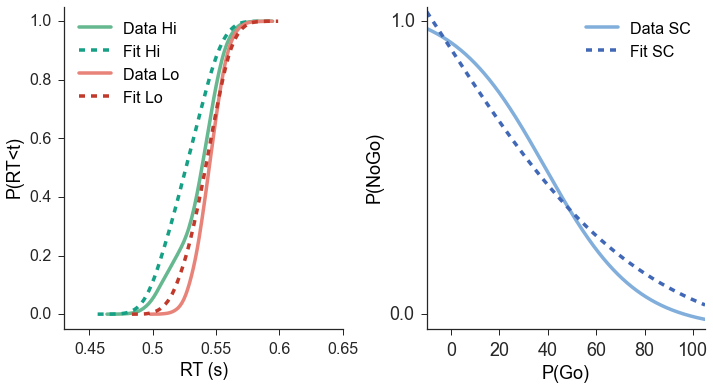

In [664]:
yhat = m.simulate()
vis.plot_fits(m.avg_y, yhat, plot_acc=True, kind='proactive', save=True, savestr='simulated_xpro_vtr')

(0, 0.41716831633365214)

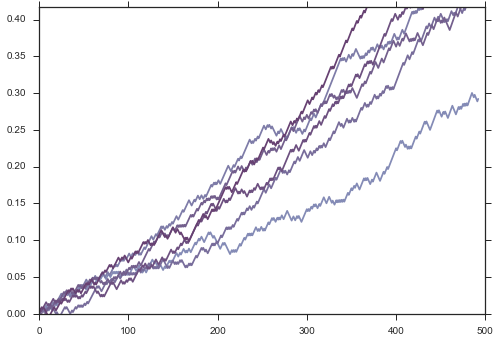

In [656]:
x=fit.Simulator(fitparams=m.fitparams, inits=m.inits, pc_map=m.pc_map, kind=m.kind)
dvg = x.simulate_xpro(m.popt)
clr = ppal(6)
for ii, i in enumerate(dvg[:, 0, :]):
      plt.plot(i, color=clr[ii])
      plt.hlines(y=m.popt['a'][0], xmin=0, xmax=len(i))
plt.gca().set_ylim(0,m.popt['a'][0])